# Part 1 - Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np

logins = pd.read_json('logins.json')

In [2]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
logins.index

RangeIndex(start=0, stop=93142, step=1)

In [6]:
logins['id'] = logins.index
logins.head()

,login_time,id
0,1970-01-01 20:13:18,0
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,2
3,1970-01-01 20:16:36,3
4,1970-01-01 20:26:21,4


In [7]:
# set index to login_time
logins = logins.set_index('login_time')
logins.head()

,id
login_time,
1970-01-01 20:13:18,0
1970-01-01 20:16:10,1
1970-01-01 20:16:37,2
1970-01-01 20:16:36,3
1970-01-01 20:26:21,4


## 1.1 Aggregate login counts based on 15-minute time intervals

In [8]:
agg_logins_15 = logins.resample('15T').count()
agg_logins_15

,id
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [9]:
agg_logins_15.rename({'id':'count'}, axis=1, inplace=True)
agg_logins_15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [10]:
# verify we've captured all logins
print(len(logins))
print(agg_logins_15['count'].sum())

93142
93142


In [11]:
agg_logins_15.index

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:30:00', '1970-04-13 16:45:00',
               '1970-04-13 17:00:00', '1970-04-13 17:15:00',
               '1970-04-13 17:30:00', '1970-04-13 17:45:00',
               '1970-04-13 18:00:00', '1970-04-13 18:15:00',
               '1970-04-13 18:30:00', '1970-04-13 18:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15T')

## 1.2 Visualize 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(16,10)})

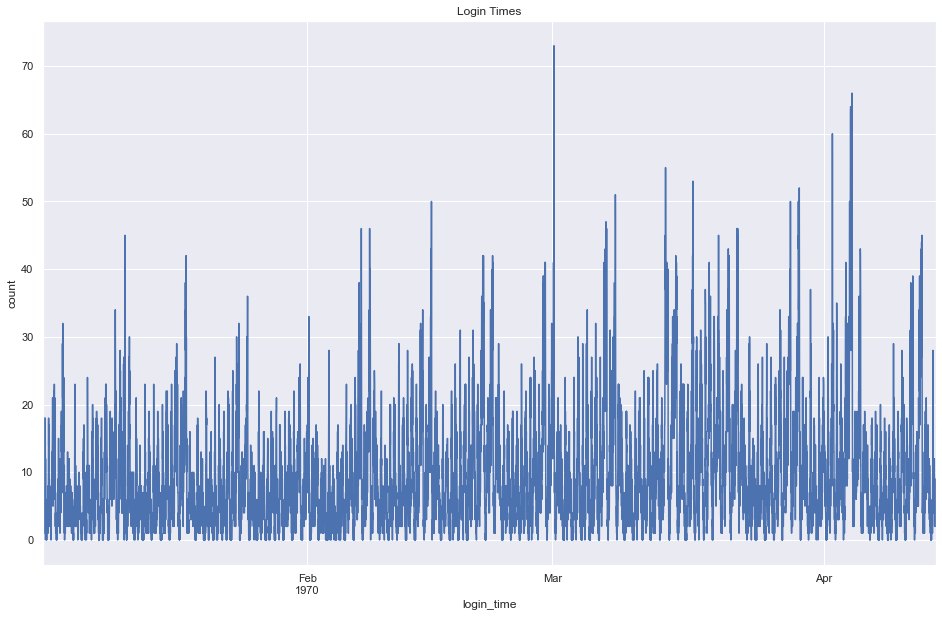

In [13]:
ax = agg_logins_15.plot()
_ = ax.set(title='Login Times', ylabel='count', xlabel='login_time')
ax.get_legend().remove()

In [14]:
print(min(agg_logins_15.index))
print(max(agg_logins_15.index))

1970-01-01 20:00:00
1970-04-13 18:45:00


The `logins` data is from January to mid April, spanning approximately 3.5 months. The above "whole picture" is very busy and is difficult to determine patterns. We will dive deeper into the data.

### 1.2.1 By Time

In [15]:
agg_logins_15['time'] = agg_logins_15.index.time
agg_logins_15.sample(15)

,count,time
login_time,,
1970-02-02 15:00:00,6,15:00:00
1970-03-01 02:15:00,20,02:15:00
1970-04-12 03:30:00,33,03:30:00
1970-02-20 02:30:00,19,02:30:00
1970-02-06 04:30:00,6,04:30:00
1970-04-09 20:30:00,17,20:30:00
1970-03-10 12:15:00,9,12:15:00
1970-02-17 15:00:00,4,15:00:00
1970-04-07 06:45:00,0,06:45:00


In [16]:
agg_logins_15.groupby('time')['count'].agg(['min','max','mean','sum'])

,min,max,mean,sum
time,,,,
00:00:00,2,34,14.107843,1439
00:15:00,2,39,15.166667,1547
00:30:00,3,53,14.950980,1525
00:45:00,4,50,14.529412,1482
01:00:00,3,54,15.186275,1549
...,...,...,...,...
22:45:00,1,50,16.049020,1637
23:00:00,2,37,15.421569,1573
23:15:00,2,47,15.215686,1552


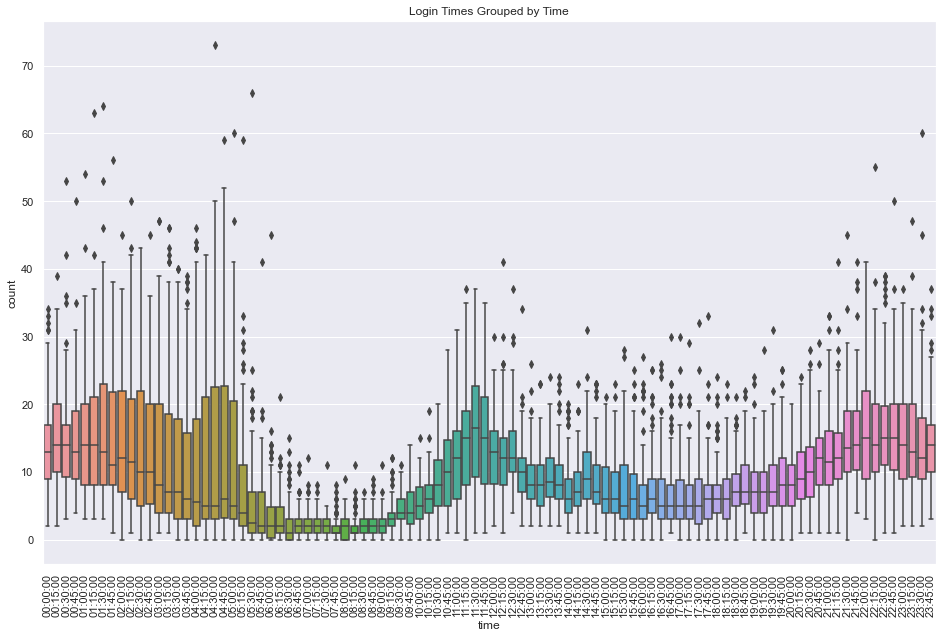

In [17]:
sorted_time = pd.DataFrame(agg_logins_15.time.unique()).rename({0:'time'},axis=1).sort_values(by='time',ascending=True)
ax = sns.boxplot(x='time',y='count',data=agg_logins_15, order=sorted_time.time)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(title='Login Times Grouped by Time')

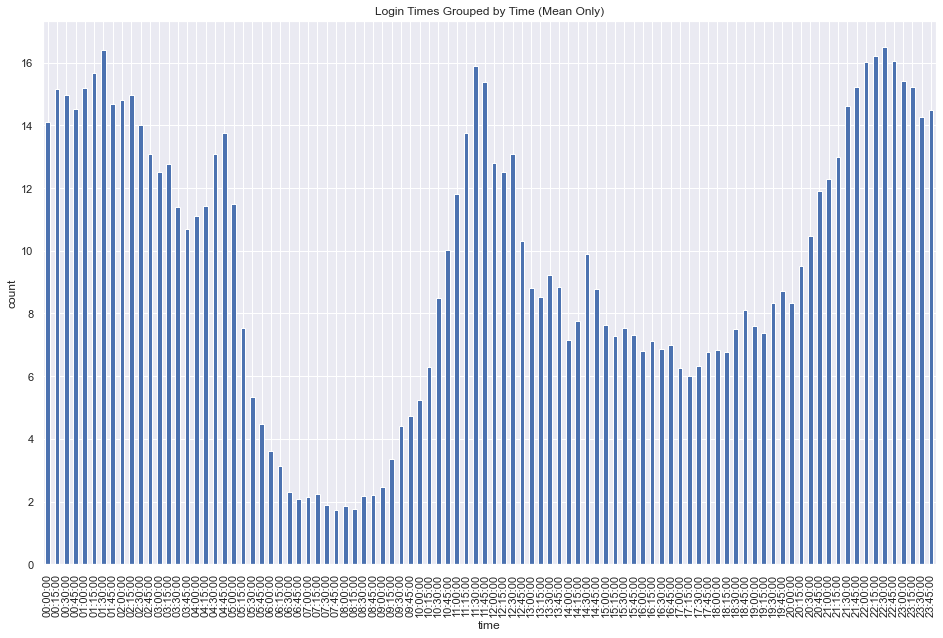

In [18]:
ax = agg_logins_15.groupby('time').mean().plot(kind='bar')
_ = ax.set(title='Login Times Grouped by Time (Mean Only)', ylabel='count', xlabel='time')
ax.get_legend().remove()

Here, we can see that on average, the least amount of logins occur in the morning (around 5 AM to 10:30 AM). Logins then increase around lunch hours (11 AM to 1 PM) before dipping during the afternoon, and then increasing again through the evening and are at their peak during late night hours (9 PM to 2 AM).

The late night / early morning hours (midnight to 5 AM) show the highest standard deviation and most range in amount of logins; conversely, the morning hours (6 AM to 10 AM) show the lowest standard deviation and least range.

Let's look at the logins by day of week.

### 1.2.2 By Day of Week

In [19]:
agg_logins_15['day_name'] = agg_logins_15.index.day_name()
agg_logins_15['day_of_week'] = agg_logins_15.index.weekday
agg_logins_15.sample(15)

,count,time,day_name,day_of_week
login_time,,,,
1970-02-12 06:30:00,0,06:30:00,Thursday,3
1970-03-06 04:45:00,4,04:45:00,Friday,4
1970-03-24 05:45:00,0,05:45:00,Tuesday,1
1970-02-13 13:30:00,8,13:30:00,Friday,4
1970-04-04 14:30:00,9,14:30:00,Saturday,5
1970-01-26 15:45:00,5,15:45:00,Monday,0
1970-03-29 15:30:00,12,15:30:00,Sunday,6
1970-01-30 21:00:00,4,21:00:00,Friday,4
1970-02-02 19:45:00,4,19:45:00,Monday,0


In [20]:
agg_logins_15.groupby('day_name')['count'].agg(['min','max','mean','sum'])

,min,max,mean,sum
day_name,,,,
Friday,0,55,10.561111,15208
Monday,0,37,6.213380,8823
Saturday,0,66,13.456250,19377
Sunday,0,73,12.615972,18167
Thursday,0,45,8.794118,11960
Tuesday,0,53,6.895833,9268
Wednesday,0,60,7.692708,10339


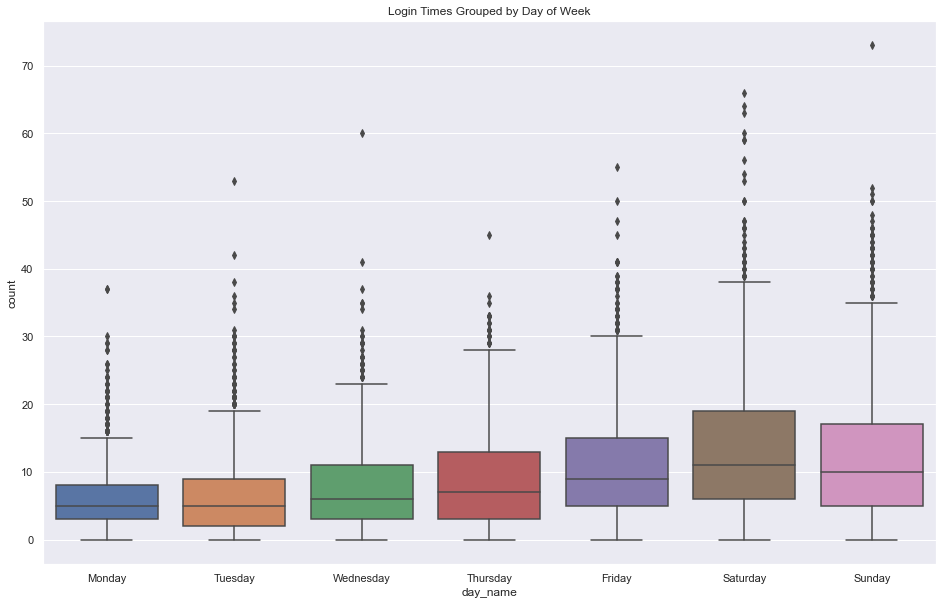

In [21]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = sns.boxplot(x='day_name',y='count',data=agg_logins_15, order=weekday_order)
_ = ax.set(title='Login Times Grouped by Day of Week')

The least amount of logins occur on Monday, gradually increasing throughout the week. Friday, Saturday, and Sunday have the highest number of logins.

# Part 2 - Experiment and metrics design

The proposal from the Ultimate managers of city operations for the two cities of Gotham and Metropolis to encourage driver partners to be available in both cities is to reimburse all toll costs.

1. The __key measure of success__ of this experiment (to encourage driver partners to serve both cities by reimbursing all toll costs) would be too see an __increase in rides provided by driver partners on weekdays__ in __Gotham at night__ and __Metropolis during the day__. The purpose of this proposal, after all, is to increase the supply of driver partners in accordance with demand of users.


2. To compare the effectiveness of the proposed change in relation to the key measure of success, we can create a practical experiment where we perform an A/B test, where the "A" version are those drivers not offered toll reimbursement and the "B" version are those drivers offered toll reimbursement. 
  * We first classify our driver partners into two groups: those who prefer to stay in Gotham, and those who prefer to stay in Metropolis. Next, we randomly select a subset of drivers from each of those two groups and offer them the proposed toll reimbursement for a defined period of time (e.g. a month). During this month, we can then capture the ride data from this group and compare it to the non-selected drivers. We can then search for statistical significance. 
  * Note, however, that even if we do find an increase in rides provided in our "B" version, the cost of toll reimbursements may make the increase in ride revenue moot. In addition, given the ride data from our "B" group, we may be able to classify our driver partners into further subgroups and truly identify which of those subgroups would find this arrangement mutually beneficial. That is, which type of driver partner increases profit the most with this incentive?  


# Part 3 - Predictive modeling

## 3.1 Cleaning, exploratory analysis, and visualizations

In [22]:
user_data = pd.read_json('ultimate_data_challenge.json')
user_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [23]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [24]:
# convert signup_date and last_trip_date to DateTime
user_data['signup_date'] = pd.to_datetime(user_data['signup_date'], format='%Y-%m-%d')
user_data['last_trip_date'] = pd.to_datetime(user_data['last_trip_date'], format='%Y-%m-%d')

In [25]:
user_data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [26]:
print(user_data.last_trip_date.min())
print(user_data.last_trip_date.max())

2014-01-01 00:00:00
2014-07-01 00:00:00


In [27]:
# assume that the current date is 2014-07-01, which would imply that a user is considered active if their last_trip_date > 2014-06-01
sum(user_data.last_trip_date > '2014-06-01') / len(user_data)

0.3662

Of the 50,0000 observed users, __the retention rate is 36.62%__.

In [28]:
# let's add a column indicating whether this user is considered active currently
user_data['is_active'] = (user_data.last_trip_date > '2014-06-01')
user_data.is_active.value_counts()

False    31690
True     18310
Name: is_active, dtype: int64

In [29]:
user_data.is_active.value_counts(normalize=True)

False    0.6338
True     0.3662
Name: is_active, dtype: float64

In [30]:
# breakdown retention rate by city
user_data.groupby('city')['is_active'].value_counts(normalize=True).

city            is_active
Astapor         False        0.756744
                True         0.243256
King's Landing  True         0.622606
                False        0.377394
Winterfell      False        0.657996
                True         0.342004
Name: is_active, dtype: float64

Wow, looks like __King's Landing__ has the highest retention rate at __62.26%__ while __Winterfell (34.2%)__ and __Astapor (24.33%)__ are having a much harder time keeping users.

### 3.1.1 Cleaning

Let's review the columns with null values. There are 3 columns: `avg_rating_of_driver` (numerical), `avg_rating_by_driver` (numerical), and `phone` (categorical).

In [31]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  is_active               50000 non-null  bool  

In [32]:
user_data.loc[:, ['avg_rating_of_driver','avg_rating_by_driver']].describe()

,avg_rating_of_driver,avg_rating_by_driver
count,41878.000000,49799.000000
mean,4.601559,4.778158
std,0.617338,0.446652
min,1.000000,1.000000
25%,4.300000,4.700000
50%,4.900000,5.000000
75%,5.000000,5.000000
max,5.000000,5.000000


In [33]:
# let's look at the distributions of columns with null broken out by city
user_data.groupby('city')[['avg_rating_of_driver','avg_rating_by_driver']].describe().T

city                             Astapor  King's Landing    Winterfell
avg_rating_of_driver count  13647.000000     8847.000000  19384.000000
                     mean       4.630593        4.706997      4.532996
                     std        0.601734        0.507236      0.663836
                     min        1.000000        1.000000      1.000000
                     25%        4.500000        4.600000      4.200000
                     50%        5.000000        5.000000      4.800000
                     75%        5.000000        5.000000      5.000000
                     max        5.000000        5.000000      5.000000
avg_rating_by_driver count  16476.000000    10090.000000  23233.000000
                     mean       4.798853        4.853162      4.730909
                     std        0.437585        0.335690      0.487770
                     min        1.000000        1.000000      1.000000
                     25%        4.800000        4.800000      4.600000
                     50%        5.000000        5.000000      5.000000
                     75%        5.000000        5.000000      5.000000
                     max        5.000000        5.000000      5.000000

In [34]:
# avg_rating_of_driver is null, by city
user_data[user_data.avg_rating_of_driver.isna()].groupby('city').agg(['count','min','max']).T

city                                      Astapor       King's Landing  \
trips_in_first_30_days count                 2887                 1283   
                       min                      0                    0   
                       max                      4                    4   
signup_date            count                 2887                 1283   
                       min    2014-01-01 00:00:00  2014-01-01 00:00:00   
                       max    2014-01-31 00:00:00  2014-01-31 00:00:00   
avg_rating_of_driver   count                    0                    0   
                       min                    NaN                  NaN   
                       max                    NaN                  NaN   
avg_surge              count                 2887                 1283   
                       min                      1                    1   
                       max                      4                    3   
last_trip_date         count                 2887                 1283   
                       min    2014-01-01 00:00:00  2014-01-01 00:00:00   
                       max    2014-07-01 00:00:00  2014-07-01 00:00:00   
surge_pct              count                 2887                 1283   
                       min                      0                    0   
                       max                    100                  100   
ultimate_black_user    count                 2887                 1283   
                       min                  False                False   
                       max                   True                 True   
weekday_pct            count                 2887                 1283   
                       min                      0                    0   
                       max                    100                  100   
avg_dist               count                 2887                 1283   
                       min                      0                    0   
                       max                 160.96               129.89   
avg_rating_by_driver   count                 2876                 1261   
                       min                      1                    1   
                       max                      5                    5   
is_active              count                 2887                 1283   
                       min                  False                False   
                       max                   True                 True   

city                                   Winterfell  
trips_in_first_30_days count                 3952  
                       min                      0  
                       max                      5  
signup_date            count                 3952  
                       min    2014-01-01 00:00:00  
                       max    2014-01-31 00:00:00  
avg_rating_of_driver   count                    0  
                       min                    NaN  
                       max                    NaN  
avg_surge              count                 3952  
                       min                      1  
                       max                      5  
last_trip_date         count                 3952  
                       min    2014-01-01 00:00:00  
                       max    2014-07-01 00:00:00  
surge_pct              count                 3952  
                       min                      0  
                       max                    100  
ultimate_black_user    count                 3952  
                       min                  False  
                       max                   True  
weekday_pct            count                 3952  
                       min                      0  
                       max                    100  
avg_dist               count                 3952  
                       min                      0  
                       max                  54.59  
avg_rating_by_driver   coun

In [35]:
# avg_rating_by_driver is null, by city
user_data[user_data.avg_rating_by_driver.isna()].groupby('city').agg(['count','min','max']).T

city                                      Astapor       King's Landing  \
trips_in_first_30_days count                   58                   40   
                       min                      0                    0   
                       max                      1                    2   
signup_date            count                   58                   40   
                       min    2014-01-03 00:00:00  2014-01-02 00:00:00   
                       max    2014-01-31 00:00:00  2014-01-31 00:00:00   
avg_rating_of_driver   count                   47                   18   
                       min                      1                    2   
                       max                      5                    5   
avg_surge              count                   58                   40   
                       min                      1                    1   
                       max                      4                  2.5   
last_trip_date         count                   58                   40   
                       min    2014-01-11 00:00:00  2014-01-10 00:00:00   
                       max    2014-06-26 00:00:00  2014-06-29 00:00:00   
surge_pct              count                   58                   40   
                       min                      0                    0   
                       max                    100                  100   
ultimate_black_user    count                   58                   40   
                       min                  False                False   
                       max                   True                 True   
weekday_pct            count                   58                   40   
                       min                      0                    0   
                       max                    100                  100   
avg_dist               count                   58                   40   
                       min                   0.09                 0.31   
                       max                 160.96                16.21   
avg_rating_by_driver   count                    0                    0   
                       min                    NaN                  NaN   
                       max                    NaN                  NaN   
is_active              count                   58                   40   
                       min                  False                False   
                       max                   True                 True   

city                                   Winterfell  
trips_in_first_30_days count                  103  
                       min                      0  
                       max                      2  
signup_date            count                  103  
                       min    2014-01-01 00:00:00  
                       max    2014-01-31 00:00:00  
avg_rating_of_driver   count                   69  
                       min                      1  
                       max                      5  
avg_surge              count                  103  
                       min                      1  
                       max                      4  
last_trip_date         count                  103  
                       min    2014-01-03 00:00:00  
                       max    2014-06-27 00:00:00  
surge_pct              count                  103  
                       min                      0  
                       max                    100  
ultimate_black_user    count                  103  
                       min                  False  
                       max                   True  
weekday_pct            count                  103  
                       min                      0  
                       max                    100  
avg_dist               count                  103  
                       min                      0  
                       max                  24.91  
avg_rating_by_driver   coun

Since there doesn't appear to be much appreciable difference between the cities for the columns `avg_rating_of_driver` and `avg_rating_by_driver`, we can use the overall distribution to impute the value.

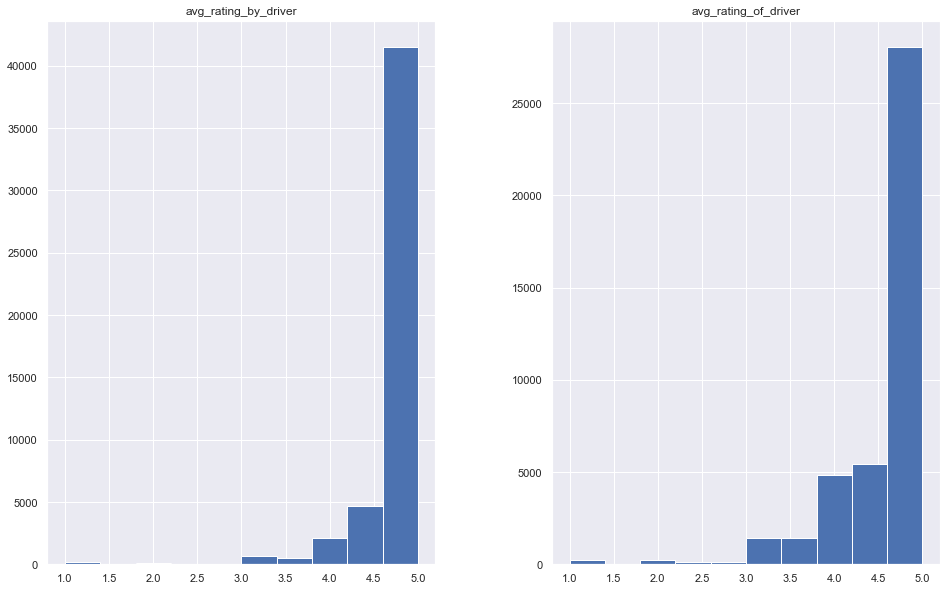

In [36]:
_ = user_data.hist(['avg_rating_of_driver','avg_rating_by_driver'])

We will use the `mean` of both columns to impute the data.

In [37]:
user_data[user_data.avg_rating_of_driver.isna()].sample(3)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_active
29772,Winterfell,1,2014-01-25,NaN,1.0,2014-01-25,Android,0.0,False,0.0,4.99,2.0,False
49715,Winterfell,1,2014-01-24,NaN,1.0,2014-03-23,iPhone,0.0,True,0.0,21.17,5.0,False
3283,Winterfell,1,2014-01-27,NaN,1.0,2014-01-28,iPhone,0.0,False,100.0,4.90,5.0,False


In [38]:
 user_data[user_data.avg_rating_by_driver.isna()].sample(3)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_active
29889,Winterfell,1,2014-01-09,NaN,1.0,2014-02-08,iPhone,0.0,False,100.0,1.30,NaN,False
1679,Winterfell,1,2014-01-25,5.0,1.0,2014-01-25,Android,0.0,True,0.0,1.99,NaN,False
14042,Winterfell,0,2014-01-11,5.0,2.5,2014-03-04,iPhone,100.0,False,100.0,1.13,NaN,False


In [39]:
user_data['avg_rating_of_driver'] = user_data['avg_rating_of_driver'].fillna(user_data['avg_rating_of_driver'].mean())
user_data['avg_rating_by_driver'] = user_data['avg_rating_by_driver'].fillna(user_data['avg_rating_by_driver'].mean())

In [40]:
user_data.iloc[[29772,49715,3283,29889,1679,14042],:]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_active
29772,Winterfell,1,2014-01-25,4.601559,1.0,2014-01-25,Android,0.0,False,0.0,4.99,2.000000,False
49715,Winterfell,1,2014-01-24,4.601559,1.0,2014-03-23,iPhone,0.0,True,0.0,21.17,5.000000,False
3283,Winterfell,1,2014-01-27,4.601559,1.0,2014-01-28,iPhone,0.0,False,100.0,4.90,5.000000,False
29889,Winterfell,1,2014-01-09,4.601559,1.0,2014-02-08,iPhone,0.0,False,100.0,1.30,4.778158,False
1679,Winterfell,1,2014-01-25,5.000000,1.0,2014-01-25,Android,0.0,True,0.0,1.99,4.778158,False
14042,Winterfell,0,2014-01-11,5.000000,2.5,2014-03-04,iPhone,100.0,False,100.0,1.13,4.778158,False


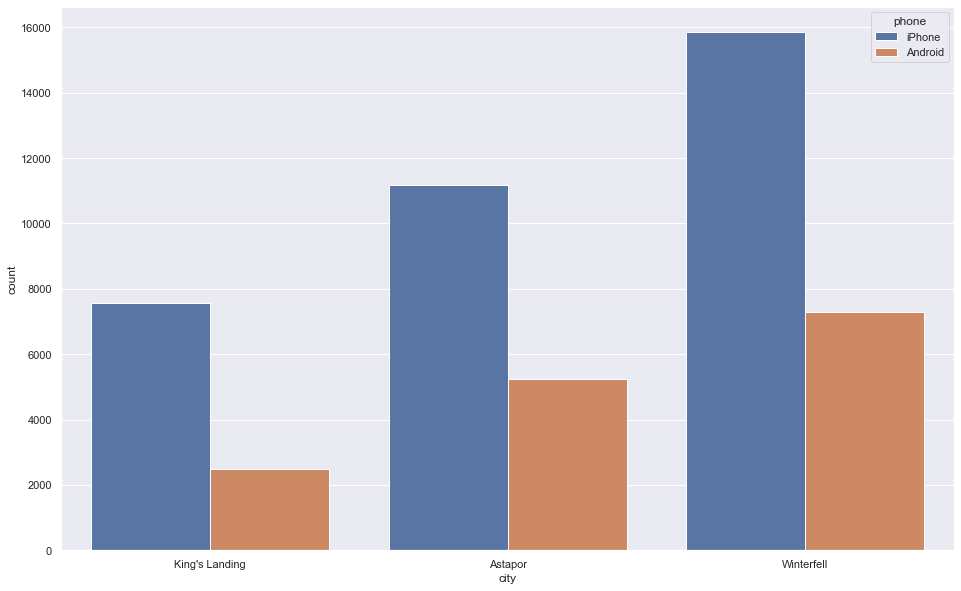

In [41]:
# look at the categorical column with null value: phone

_ = sns.countplot(x='city', hue='phone', data=user_data[['city','phone']])

In [42]:
# phone is null
user_data[user_data.phone.isna()].groupby('city').size()

city
Astapor           121
King's Landing     64
Winterfell        211
dtype: int64

In [43]:
user_data[user_data.phone.isna()].sample(3)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_active
18199,Winterfell,0,2014-01-18,4.500000,1.0,2014-03-26,None,0.0,False,50.0,3.01,5.0,False
25462,Winterfell,0,2014-01-09,3.000000,1.0,2014-05-01,None,0.0,False,100.0,9.88,5.0,False
17715,Winterfell,2,2014-01-28,4.601559,1.0,2014-02-16,None,0.0,False,50.0,4.14,5.0,False


In [44]:
# iPhone is still the overwhelming choice, so fill in nulls with most common (mode) which happens to be iPhone
user_data['phone'] = user_data['phone'].fillna(user_data['phone'].value_counts().index[0])

In [45]:
user_data.iloc[[18199,25462,17715],:]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_active
18199,Winterfell,0,2014-01-18,4.500000,1.0,2014-03-26,iPhone,0.0,False,50.0,3.01,5.0,False
25462,Winterfell,0,2014-01-09,3.000000,1.0,2014-05-01,iPhone,0.0,False,100.0,9.88,5.0,False
17715,Winterfell,2,2014-01-28,4.601559,1.0,2014-02-16,iPhone,0.0,False,50.0,4.14,5.0,False


In [46]:
# verify no more nulls
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  is_active               50000 non-null  bool  

We also want to convert our categorical columns (`city`,`phone`) into integer columns for our model. We can do this by creating dummy variable columns.

In [47]:
user_data = pd.get_dummies(user_data, columns=['city','phone'], dtype=int)
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_rating_of_driver    50000 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   surge_pct               50000 non-null  float64       
 6   ultimate_black_user     50000 non-null  bool          
 7   weekday_pct             50000 non-null  float64       
 8   avg_dist                50000 non-null  float64       
 9   avg_rating_by_driver    50000 non-null  float64       
 10  is_active               50000 non-null  bool          
 11  city_Astapor            50000 non-null  int32         
 12  city_King's Landing     50000 non-null  int32 

In [48]:
# let's also convert all our bool columns into ints
user_data['ultimate_black_user'] = user_data['ultimate_black_user'].astype(int)
user_data['is_active'] = user_data['is_active'].astype(int)

In [49]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_rating_of_driver    50000 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   surge_pct               50000 non-null  float64       
 6   ultimate_black_user     50000 non-null  int32         
 7   weekday_pct             50000 non-null  float64       
 8   avg_dist                50000 non-null  float64       
 9   avg_rating_by_driver    50000 non-null  float64       
 10  is_active               50000 non-null  int32         
 11  city_Astapor            50000 non-null  int32         
 12  city_King's Landing     50000 non-null  int32 

### 3.1.2 Visualizations

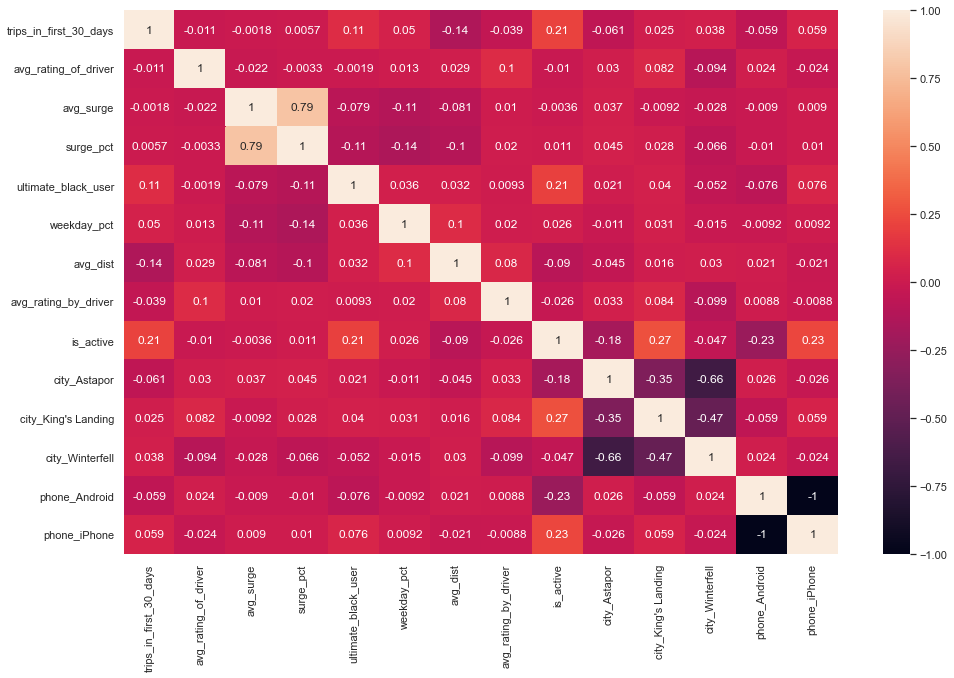

In [50]:
# look at the correlations
sns.heatmap(user_data.corr(), annot=True);

In [51]:
# let's look specifically at feature correlations with our 'is_active' column
user_data.corr()['is_active'].sort_values()

phone_Android            -0.231731
city_Astapor             -0.179373
avg_dist                 -0.090279
city_Winterfell          -0.046985
avg_rating_by_driver     -0.025595
avg_rating_of_driver     -0.010082
avg_surge                -0.003567
surge_pct                 0.010612
weekday_pct               0.026413
ultimate_black_user       0.210259
trips_in_first_30_days    0.214728
phone_iPhone              0.231731
city_King's Landing       0.268272
is_active                 1.000000
Name: is_active, dtype: float64

We can see that customer retention is most strongly positively correlated with the features `ultimate_black_user`, `trips_in_first_30_days`, `phone_iPhone`, and `city_King's Landing` and most strongly negatively correlated with the features `phone_Android` and `city_Astapor`.

Let's also look at distributions of some of these features.

In [52]:
user_data.columns.sort_values()

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell', 'is_active',
       'last_trip_date', 'phone_Android', 'phone_iPhone', 'signup_date',
       'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user',
       'weekday_pct'],
      dtype='object')

C:\Users\fonta\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\fonta\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


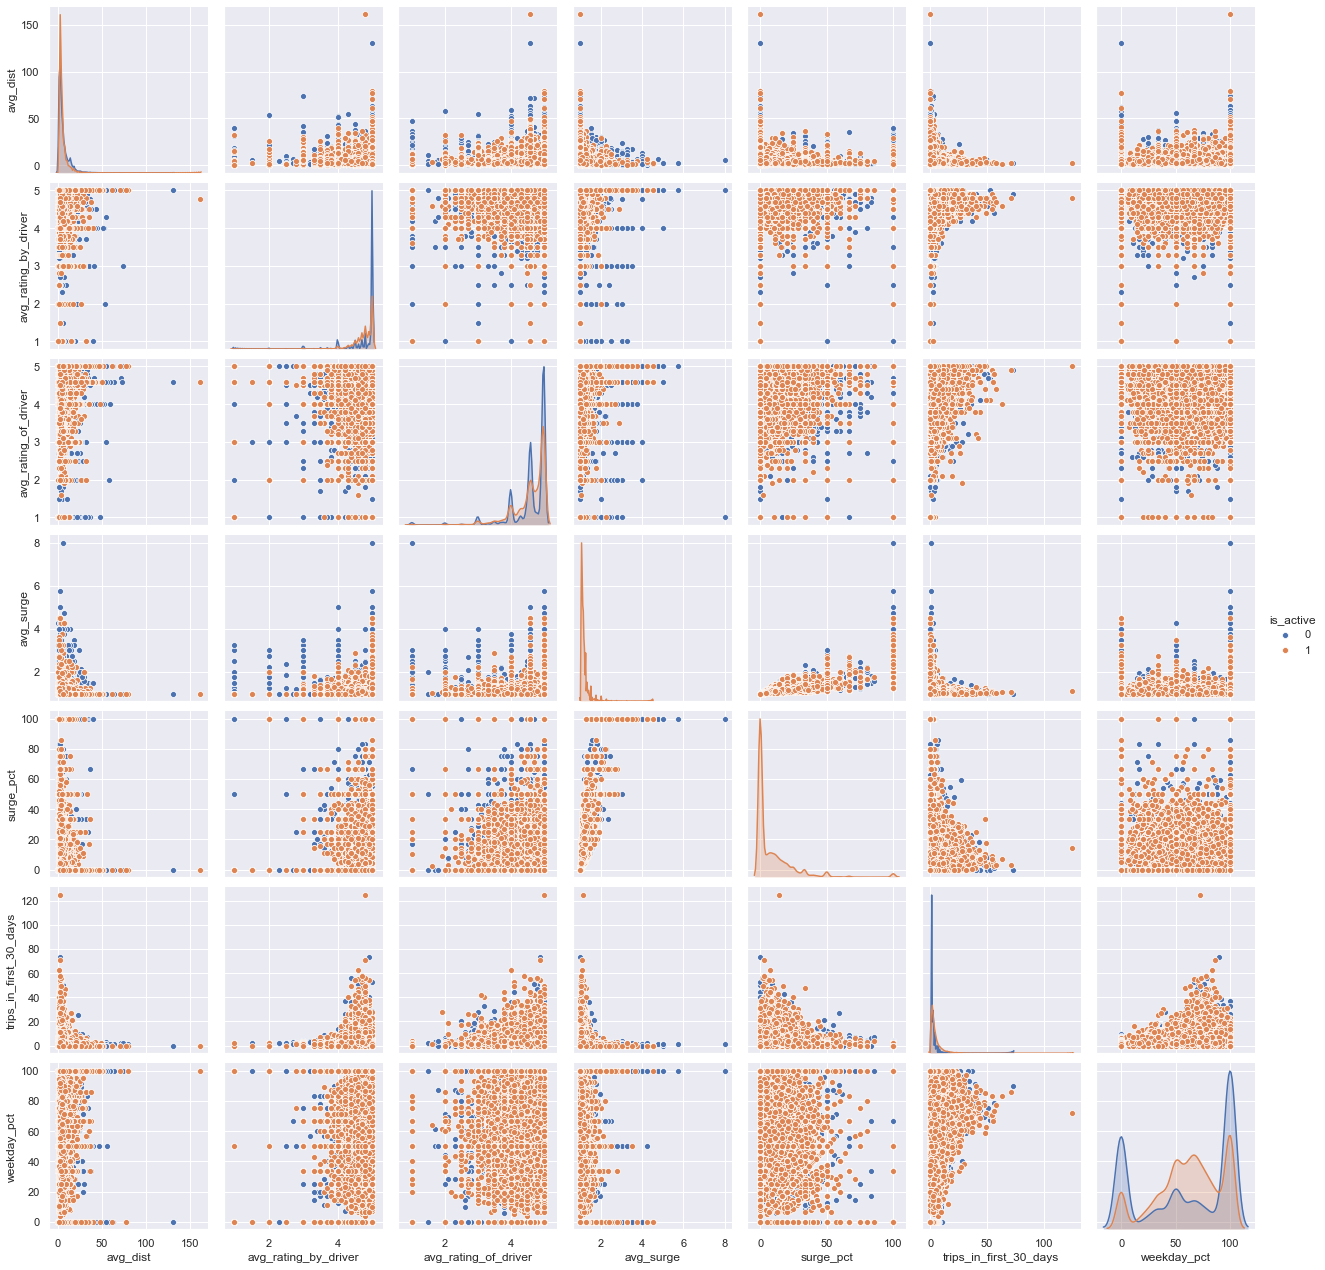

In [53]:
_ = sns.pairplot(user_data[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
                            'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'is_active']], 
                 hue='is_active')

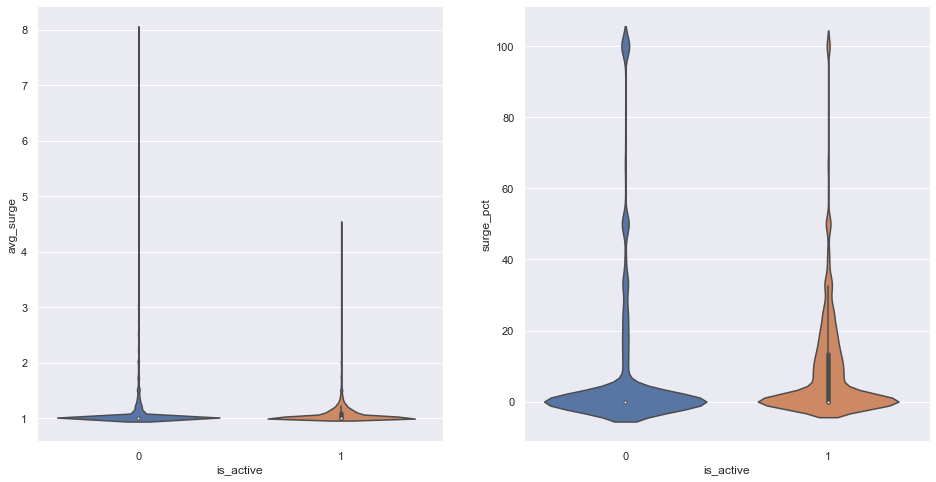

In [54]:
# let's look specifically at surges
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,2,1)
_ = sns.violinplot(x='is_active', y='avg_surge', data=user_data[['is_active','avg_surge']])
ax = fig.add_subplot(1,2,2)
_ = sns.violinplot(x='is_active', y='surge_pct', data=user_data[['is_active','surge_pct']])

__EDA Summary__

  * Retention rate after 6 months is 36.62%. The retention differs greatly and is much higher in King's Landing (62.26%) and much lower in Winterfell (34.2%) and Astapor (24.33%).
  * Non-active users were ~3 times more likely to have taken 0 `trips_in_first_30_days` as compared to active users.
  * The distribution of `weekday_pct` is distinctly different between active and non-active users (non-active users have 2 sharp peaks at 0 and 100%, active users are more spread out).
  * With regards to surges, non-active users appears to have a range containing higher `avg_surge`, and more non-active users have higher `surge_pct`.

## 3.2 Modeling

In order to predict whether or not a user will be active in their 6th month on the system, we must build a classification model. We'll use the following classifiers and use accuracy as the metric of success.

  * K Nearest Neighbors Classifier
  * Decision Tree Classifier
  * Random Forest Classifier
  * Gradient Boosting Classifier
  * Linear Support Vector Machine Classifier
  * Naive Bayes

In [55]:
# first split the data into 80-20 training and testing
from sklearn.model_selection import train_test_split

X = user_data.drop(columns=['signup_date','last_trip_date','is_active'])
y = user_data['is_active']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

classifiers = dict()

knn = KNeighborsClassifier()
classifiers['K-Nearest Neighbors'] = knn

dtc = DecisionTreeClassifier()
classifiers['Decision Tree'] = dtc

rfc = RandomForestClassifier(n_estimators=100)
classifiers['Random Forest'] = rfc

gbc = GradientBoostingClassifier(n_estimators=100)
classifiers['Gradient Boosting'] = gbc

svc = SVC(kernel="linear", C=0.025)
classifiers['Linear SVM'] = svc

nb = GaussianNB()
classifiers['Naive Bayers'] = nb

In [57]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

results = []

for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    classrpt = classification_report(y_test, y_pred)
    results.append([model_name, acc, f1, cm, classrpt])

In [58]:
print("{:<20} {:<10} {:<10}".format('Model', 'Accuracy', 'F1-score'))
for model_name, acc, f1, cm, classrpt in results:
    print("{:<20} {:<10} {:<10}".format(model_name, acc, f1))
    print('Confusion Matrix of',model_name)
    print(cm)
    print('Classification Report of',model_name)
    print(classrpt)

Model                Accuracy   F1-score  
K-Nearest Neighbors  0.7537     0.7515964901613685
Confusion Matrix of K-Nearest Neighbors
[[5231 1098]
 [1365 2306]]
Classification Report of K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      6329
           1       0.68      0.63      0.65      3671

    accuracy                           0.75     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.75      0.75      0.75     10000

Decision Tree        0.7116     0.7113493218837695
Confusion Matrix of Decision Tree
[[4902 1427]
 [1457 2214]]
Classification Report of Decision Tree
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6329
           1       0.61      0.60      0.61      3671

    accuracy                           0.71     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.71      0.71      0.71 

In [59]:
print("{:<20} {:<10} {:<10}".format('Model', 'Accuracy', 'F1-score'))
for model_name, acc, f1, cm, classrpt in results:
    print("{:<20} {:<10} {:<10}".format(model_name, acc, f1))

Model                Accuracy   F1-score  
K-Nearest Neighbors  0.7537     0.7515964901613685
Decision Tree        0.7116     0.7113493218837695
Random Forest        0.763      0.7617303076711124
Gradient Boosting    0.7924     0.7896633583064583
Linear SVM           0.6984     0.6790421669668764
Naive Bayers         0.7024     0.7069693041369208


Our most accurate model was __Gradient Boosting Classifier__ with an accuracy of __nearly 80%__. It also had high precision and recall for both classes. One caveat here is Gradient Boosting Models can be prone to overfitting; thus, if we were to refine this model, we would use cross-validation to fine-tune the hyperparameters of the model. 

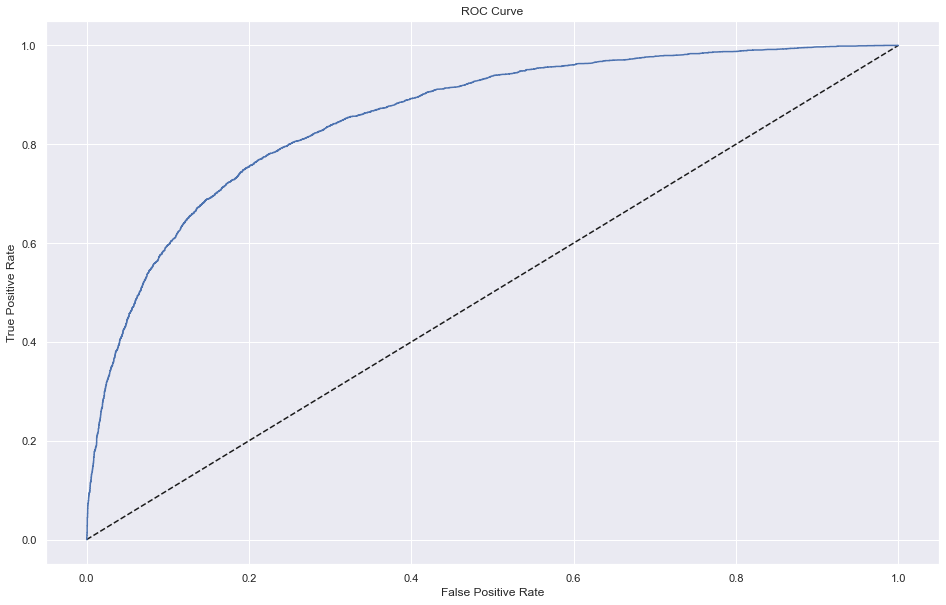

In [60]:
# plot the ROC curve
from sklearn.metrics import roc_curve

y_pred_prob = gbc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## 3.3 Model Insights

Let's look at feature importance our top 2 models: Gradient Boosting Classifier and Random Forest Classifier.

In [61]:
def plot_feature_importance(model, model_name):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(16,8))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('{} - Feature Importance'.format(model_name))
    plt.show()

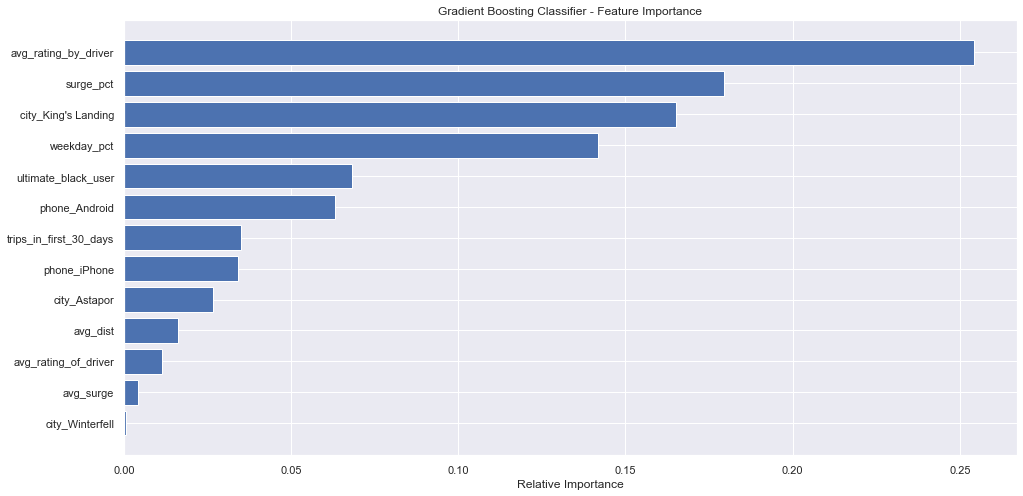

In [62]:
plot_feature_importance(gbc, 'Gradient Boosting Classifier')

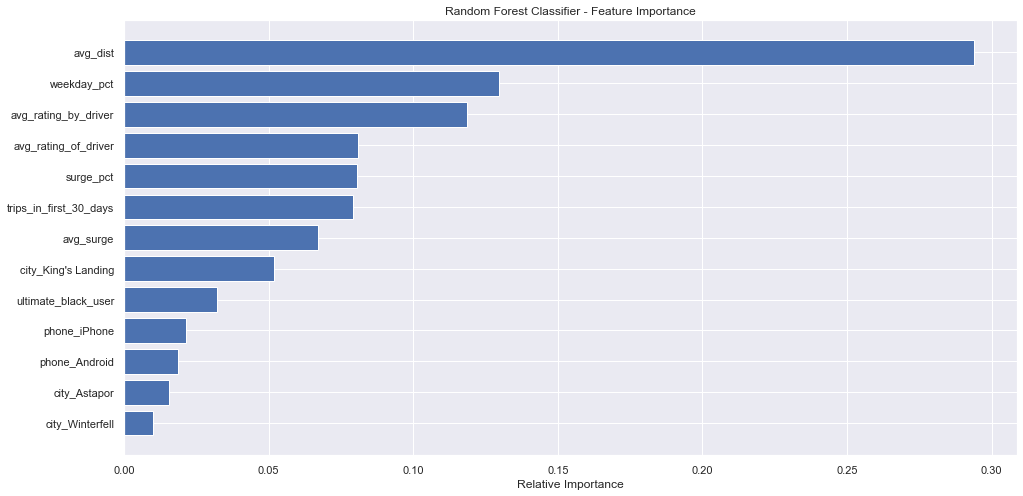

In [63]:
plot_feature_importance(rfc, 'Random Forest Classifier')

Interestingly, the Gradient Boosting Classifier identifies 4 features (`avg_rating_by_driver`, `surge_pct`, `city_King's Landing`, and `weekday_pct`) as important, whereas the Random Forest Classifier identifies only 1 feature (`avg_dist`) as highly important. This would require further investigation in fine-tuning both models. 

__Takeaways for Ultimate__
  * Identify what Ultimate is doing right in King's Landing to retain users, and transfer that knowledge to Winterfell and Astapor.
  * Review the surge pricing algorithm, as high `surge_pct` appears to reduce customer retention.
  * Examine higher distance trips, and consider offering perks or discounts, as high `avg_dist` may be impacting retention.